**Exercise**

# Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.

You are given the array `points` from the previous exercise, and also an array `new_points`.

**Instruction**

- Import `KMeans` from `sklearn.cluster`.
- Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument.
- Use the `.fit()` method of `model` to fit the model to the array of points `points`.
- Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `labels`.
- Hit 'Submit Answer' to see the cluster labels of `new_points`.

In [1]:
import pandas as pd

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2072/datasets/3-point-clouds-in-2d.csv', header=None)
data = df.values
N = 300
points = data[:N,:]
new_points = data[N:,:]


In [2]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[0 2 1 0 2 0 2 2 2 1 0 2 2 1 1 2 1 1 2 2 1 2 0 2 0 1 2 1 1 0 0 2 2 2 1 0 2
 2 0 2 1 0 0 1 0 2 1 1 2 2 2 2 1 1 0 0 1 1 1 0 0 2 2 2 0 2 1 2 0 1 0 0 0 2
 0 1 1 0 2 1 0 1 0 2 1 2 1 0 2 2 2 0 2 2 0 1 1 1 1 0 2 0 1 1 0 0 2 0 1 1 0
 1 1 1 2 2 2 2 1 1 2 0 2 1 2 0 1 2 1 1 2 1 2 1 0 2 0 0 2 1 0 2 0 0 1 2 2 0
 1 0 1 2 0 1 1 0 1 2 2 1 2 1 1 2 2 0 2 2 1 0 1 0 0 2 0 2 2 0 0 1 0 0 0 1 2
 2 0 1 0 1 1 2 2 2 0 2 2 2 1 1 0 2 0 0 0 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 1
 2 2 0 1 0 0 1 0 1 0 1 2 2 1 2 2 2 1 0 0 1 2 2 1 2 1 1 2 1 1 0 1 0 0 0 2 1
 1 1 0 2 0 1 0 1 1 2 0 0 0 1 2 2 2 0 2 1 1 2 0 0 1 0 0 1 0 2 0 1 1 1 1 2 1
 1 2 2 0]


**Exercise**

# Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so `new_points` is an array of points and `labels` is the array of their cluster labels.

**Instruction**

- Import `matplotlib.pyplot` as `plt`.
- Assign column `0` of `new_points` to `xs`, and column `1` of `new_points` to `ys`.
- Make a scatter plot of `xs` and `ys`, specifying the `c=labels` keyword arguments to color the points by their cluster label. Also specify `alpha=0.5`.
- Compute the coordinates of the centroids using the `.cluster_centers_` attribute of `model`.
- Assign column `0` of `centroids` to `centroids_x`, and column `1` of `centroids` to `centroids_y`.
- Make a scatter plot of `centroids_x` and `centroids_y`, using `'D'` (a diamond) as a marker by specifying the `marker` parameter. Set the size of the markers to be `50`using `s=50`.

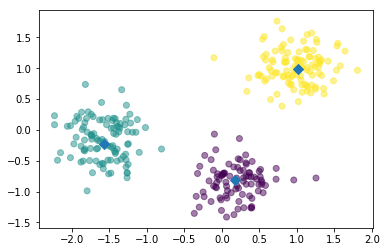

In [4]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


**Exercise**

# How many clusters of grain?

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array `samples` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

`KMeans` and PyPlot (`plt`) have already been imported for you.

This dataset was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds).

**Instruction**

- For each of the given values of `k`, perform the following steps:
- Create a `KMeans` instance called `model` with `k`clusters.
- Fit the model to the grain data `samples`.
- Append the value of the `inertia_` attribute of `model`to the list `inertias`.
- The code to plot `ks` vs `inertias` has been written for you, so hit 'Submit Answer' to see the plot!

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)
samples = df[list(range(7))].values


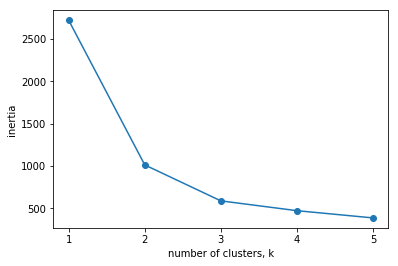

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


**Exercise**

# Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array `samples` of grain samples, and a list `varieties` giving the grain variety for each sample. Pandas (`pd`) and `KMeans` have already been imported for you.

**Instruction**

- Create a `KMeans` model called `model` with `3`clusters.
- Use the `.fit_predict()` method of `model` to fit it to `samples` and derive the cluster labels. Using `.fit_predict()` is the same as using `.fit()` followed by `.predict()`.
- Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values. This has been done for you.
- Use the `pd.crosstab()` function on `df['labels']`and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.
- Hit 'Submit Answer' to see the cross-tabulation!

In [24]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)
samples = df[list(range(7))].values
varieties = list(df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}))


In [25]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


**Exercise**

# Scaling fish data for clustering

You are given an array `samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/jse_data_archive.htm).

**Instruction**

- Import:
  - `make_pipeline` from `sklearn.pipeline`.
  - `StandardScaler` from `sklearn.preprocessing`.
  - `KMeans` from `sklearn.cluster`.
- Create an instance of `StandardScaler` called `scaler`.
- Create an instance of `KMeans` with `4` clusters called `kmeans`.
- Create a pipeline called `pipeline` that chains `scaler`and `kmeans`. To do this, you just need to pass them in as arguments to `make_pipeline()`.

In [26]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


**Exercise**

# Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, `samples` is the 2D array of fish measurements. Your pipeline is available as `pipeline`, and the species of every fish sample is given by the list `species`.

**Instruction**

- Import `pandas` as `pd`.
- Fit the pipeline to the fish measurements `samples`.
- Obtain the cluster labels for `samples` by using the `.predict()` method of `pipeline`.
- Using `pd.DataFrame()`, create a DataFrame `df` with two columns named `'labels'` and `'species'`, using `labels` and `species`, respectively, for the column values.
- Using `pd.crosstab()`, create a cross-tabulation `ct` of `df['labels']` and `df['species']`.

In [28]:
import pandas as _pd

df = _pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/fish.csv', header=None)
species = list(df[0])
samples = df[list(range(1, len(df.columns)))].values

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans model: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)



In [29]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


**Exercise**

# Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which you used in the previous exercise. While `StandardScaler()` standardizes **features**(such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` rescales **each sample** - here, each company's stock price - independently of the other.

`KMeans` and `make_pipeline` have already been imported for you.

**Instruction**

- Import `Normalizer` from `sklearn.preprocessing`.
- Create an instance of `Normalizer` called `normalizer`.
- Create an instance of `KMeans` called `kmeans` with `10`clusters.
- Using `make_pipeline()`, create a pipeline called `pipeline` that chains `normalizer` and `kmeans`.
- Fit the pipeline to the `movements` array.

In [31]:
import pandas as pd

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2072/datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
companies = list(df.index)
movements = df.values

# facilitative imports
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline


In [32]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

**Exercise**

# Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline `pipeline`containing a `KMeans` model and fit it to the NumPy array `movements` of daily stock movements. In addition, a list `companies` of the company names is available.

**Instruction**

- Import `pandas` as `pd`.
- Use the `.predict()` method of the pipeline to predict the labels for `movements`.
- Align the cluster labels with the list of company names `companies` by creating a DataFrame `df` with `labels` and `companies` as columns. This has been done for you.
- Use the `.sort_values()` method of `df` to sort the DataFrame by the `'labels'` column, and print the result.
- Hit 'Submit Answer' and take a moment to see which companies are together in each cluster!

In [33]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
29       0                     Lookheed Martin
36       0                    Northrop Grumman
4        0                              Boeing
38       1                               Pepsi
40       1                      Procter Gamble
27       1                      Kimberly-Clark
9        1                   Colgate-Palmolive
25       1                   Johnson & Johnson
54       1                            Walgreen
56       1                            Wal-Mart
46       2                      Sanofi-Aventis
6        2            British American Tobacco
43       2                                 SAP
49       2                               Total
52       2                            Unilever
37       2                            Novartis
31       2                           McDonalds
19       2                     GlaxoSmithKline
47       2                            Symantec
42       2                   Royal Dutch Shell
35       3   